# Instrucciones

- El desafío es individual, por lo cual se considera que todo el código entregado es de elaboración propia y no ha sido compartido de forma alguna.
- Las consultas sobre el desafío se deben realizar por medio de la plataforma Aula. **No está permitido publicar código en consultas de Aula**.
- El desafío debe ser realizado en Jupyter Notebook (Python3) utilizando este archivo como base.
- Debe utilizar arreglos de ```NumPy``` junto a las funciones y bibliotecas que se ponen a disposición en este archivo.
- Se debe respetar las firmas de las funciones, sus parámetros y retornos. Para eso se incluye un detalle de cada función tanto de las entregadas como las que deberá implementar. En caso de no seguir estas instrucciones, el desafío no podrá evaluarse.
- Se evaluará la correcta utilización de librerias ```NumPy```, ```SciPy```, entre otras, así como la correcta implementación de algoritmos de forma vectorizada.
- Evitar la impresión de mensajes salvo que se solicite en el enunciado.
- El archivo de entrega debe denominarse **ROL-desafio-numero.ipynb**. **De no respetarse este formato existirá un descuento de 50 puntos**
- La fecha de entrega es el **miércoles 27 de Mayo a las 10:00 hrs**,  posteriormente existirá un descuento lineal hasta las 11:00 hrs del mismo día.

In [1]:
# Libraries
import time # For time profiling
import numpy as np # Linear algebra and data structure
import matplotlib.pyplot as plt # Plots
from scipy import linalg as spla # Linear Algebra

# Introducción 

En el siguiente desafio estudiaremos la complejidad temporal de resolver sistemas de ecuaciones lineales utilizando: la matriz inversa, PALU, Cholesky, y el _solver_ de NumPy. 
Para poder obtener la complejidad temporal de forma experimental se deberá medir el tiempo que les toma a cada uno de los métodos en resolver un sistema de ecuaciones de tamaño $n \times n$. 

## Recordatorio

### Sistema de ecuaciones lineales

\begin{equation}
  A \mathbf{x} = \mathbf{b}
\end{equation}

### Algoritmo de resolución utilizando la inversa


1. $B=A^{-1}$
2. $\mathbf{x} = B\,\mathbf{b}$
3. Retornar $\mathbf{x}$

### Resolución utilizando $PA=LU$

\begin{equation}
  \begin{split}
    A\, \mathbf{x} & = \mathbf{b} \\
    PA\, \mathbf{x} & = P\,\mathbf{b} \\
    LU\, \mathbf{x} & = P\, \mathbf{b} \\
    L\, \mathbf{c} & = P\, \mathbf{b}
  \end{split}
\end{equation}

Algoritmo,
1. Obtener descomposición PALU: $PA=LU$ 
2. Resolver para $\mathbf{c}$: $L\,\mathbf{c} = P\, \mathbf{b}$
3. Resolver para $\mathbf{x}$: $U\,\mathbf{x} = \mathbf{c}$
4. Retornar $\mathbf{x}$

### Resolución utilizando Cholesky

\begin{equation}
  \begin{split}
    A \, \mathbf{x} & = \mathbf{b} \\
    R^T\,R \,\mathbf{x} & = \mathbf{b}
  \end{split}
\end{equation}

Algoritmo,
1. Obtener descomposición de Cholesky: $A=R^T\,R$
2. Resolver para $\mathbf{c}$: $R^T\mathbf{c} = \mathbf{b}$
3. Resolver para $\mathbf{x}$: $R\,\mathbf{x} = \mathbf{c}$
4. Retornar $\mathbf{x}$


# Ejercicio

Midiendo el tiempo que demora la resolución de sistemas de ecuaciones lineales para distintos tamaños, se puede estimar la complejidad temporal en función de su tamaño, es decir $n$.

Para generar sistemas de ecuaciones lineales, usted dispone de la función  ```generateLinearSystem(n)``` que recibe como argumento un número entero $n$ y retorna una matriz $A\in\mathbb{R}^{n\times n}$ definida positiva y un vector $\mathbf{b}\in\mathbb{R}^n$ aleatorio.
A modo de referencia: ¿Qué propiedades tiene la matriz construida? ¿Cual sería la solución del sistema de ecuaciones lineales?

In [2]:
def generateLinearSystem(n):
    """
    Parameters
    ----------
    n       : int
            System of linear equations size

    Returns
    -------
    A       : (n, n) array
            Positive definite matrix with random values
    b       : (n, ) array
            RHS vector
    """
    # Matrix generation
    A = np.random.rand(n, n)
    A = np.dot(A.T, A) # Symmetric matrix
    A += np.eye(n) # Diagonally dominant 

    # RHS generation
    b = np.dot(A, np.ones(n))

    return A, b

A continuación se entregan las funciones que implementan los 4 algoritmos mencionados anteriormente:

In [3]:
def solveInverse(A, b):
    """
    Parameters
    ----------
    A       : (n, n) array
            Positive definite matrix with random values
    b       : (n, ) array
            RHS vector

    Returns
    -------
    x       : (n, ) array
            System of linear equations solution
    """
    # Inverse matrix
    B = np.linalg.inv(A)

    # Get solution
    x = np.dot(B, b)

    return x

In [4]:
def solvePALU(A, b):
    """
    Parameters
    ----------
    A       : (n, n) array
            Positive definite matrix with random values
    b       : (n, ) array
            RHS vector

    Returns
    -------
    x       : (n, ) array
            System of linear equations solution
    """
    # PA=LU factorization
    P, L, U = spla.lu(A)

    # Vector permutation
    Pb = np.dot(P, b)

    # Forward substitution
    c = spla.solve_triangular(L, Pb, lower=True)

    # Backward substituion
    x = spla.solve_triangular(U, c)

    return x

In [5]:
def solveCholesky(A, b):
    """
    Parameters
    ----------
    A       : (n, n) array
            Positive definite matrix with random values
    b       : (n, ) array
            RHS vector

    Returns
    -------
    x       : (n, ) array
            System of linear equations solution
    """
    # Cholesky decomposition
    # Warning: R in Scipy is different from the classnotes, but it is the same idea.
    R = np.linalg.cholesky(A)

    # Forward substitution
    c = spla.solve_triangular(R, b, lower=True)

    # Backward substitution
    x = spla.solve_triangular(R.T, c)

    return x

In [6]:
def solveDirect(A, b):
    """
    Parameters
    ----------
    A       : (n, n) array
            Positive definite matrix with random values
    b       : (n, ) array
            RHS vector

    Returns
    -------
    x       : (n, ) array
            System of linear equations solution
    """
    x = np.linalg.solve(A, b)
    return x

A continuación, se entrega la función ```obtainComputationTimes(solver, Ns, Ne)```, la cual obtiene el tiempo de computación utilizado en la ejecución por el algoritmo ```solver``` en resolver un sistema de ecuaciones lineales de tamaño $Ns[i]\times Ns[i]$, para todo $i$. Además se puede incluir un parámetro adicional, $N_e$, que define el número de veces que se repite el experimento para obtener una mejor aproximación y reducir los efectos de computaciones concurrentes que puedan afectar los tiempos de computación. Mientras mayor es $N_e$ mejor es la estimación pero toma mayor tiempo la ejecución.

In [7]:
def obtainComputationTimes(solver, Ns, Ne=5):
    """
    Parameters
    ----------
    solver            : function
                      Function with linear system solver implementation
    N                 : (n, ) array 
                      Array of integers with system size
    Ne                : int
                      Number of experiments

    Returns
    -------
    times_solver      : (n, ) array
                      Mean times using solver
    """
    Nn = Ns.shape[-1]
    times_solver = np.zeros(Nn)

    for i in range(Nn):
        # Generate system Ax=b
        A, b = generateLinearSystem(Ns[i])

        # Compute time
        start = time.time()
        # Repeating the computation "Ne" times to get more accurate results.
        for e in range(Ne):
            x_i = solver(A, b)
        end = time.time()

        # Get mean time
        times_solver[i] = (end - start) / Ne

    return times_solver

Recordando que para la factorización PALU se determinó que su complejidad computacional era $\sim \dfrac{2}{3}n^3$, donde $n$ correspondía al tamaño del sistema de ecuaciones lineales. 
En este desafío se quiere estudiar la estimación experimental de tal complejidad, por ejemplo para un algoritmo denotado por ```solver``` podemos indicar que su complejidad computacional tiene la forma $\sim c\,n^p$, donde $c$ sería su coeficiente y $p$ su exponente, en el caso de PALU, $c=\dfrac{2}{3}$ y $p=3$.
En particular, podemos determinar el tiempo total de computación con la siguiente relación $\text{totalTime}\approx c\,n^p\,\text{TOp}$, donde ```TOp``` se puede obtener como se explica a continuación.

Mediante la función ```timeOperation()``` usted debe estimar el tiempo promedio de las $4$ operaciones elementales, el cual se denomina ```TOp```. **Debe considerar que el tiempo de ejecución de esta función no debe superar los $20$ segundos**.



In [8]:
def timeOperation():
    """
    Returns
    -------
    TOp       : float
              Elementary operation estimation time
    """
    # Algorithm...
    
    # number of operations
    n = 10000000 

    # execution times
    lS = 0  # sum
    ld = 0  # division
    lm = 0  # mutiplication
    ls = 0  # substraction
    
    # time medition
        # sum
    start = time.perf_counter()
    for i in range(n):
        x = 2+2
    end = time.perf_counter()
    lS = (end-start)/n
        
    # multiplication
    start = time.perf_counter()
    for i in range(n):     
        x = 2*2
    end = time.perf_counter()
    lm = (end-start)/n
    
    # subtraction
    start = time.perf_counter()
    for i in range(n):
        x = 2-2
    end = time.perf_counter()
    ls = (end-start)/n
    
    # division        
    start = time.perf_counter()
    for i in range(n):
        x = 2/2
    end = time.perf_counter()
    ld = (end-start)/n
    
    # averages calculation
    
    TOp = (lS + lm + ld + ls)/4
    return TOp

Además debe implementar la función ```findComplexity(Ns, times, TOp)``` donde ```Ns``` es el arreglo con el tamaño de los sistemas, ```times``` es el arreglo con los tiempos del algoritmo analizado y ```TOp``` es la estimación del tiempo que demora una operación elemental. Esta función debe retornar el coeficiente ```c``` y el exponente ```p``` indicados anteriormente.
Utilice su algoritmo para determinar la complejidad experimental de  ```solveInverse```, ```solvePALU```, ```solveCholesky```, y ```solveDirect``` a modo de ejemplo. Su tarea será evaluada con otros algoritmos luego.

In [9]:
TOp = timeOperation()

In [10]:
ns = (np.linspace(700,1000,200)).astype("int")

In [11]:
Dir = obtainComputationTimes(solveDirect, ns)
palu = obtainComputationTimes(solvePALU, ns)
inv = obtainComputationTimes(solveInverse, ns)
ch = obtainComputationTimes(solveCholesky, ns)

In [12]:
def findComplexity(Ns, times, Top):
    """
    Parameters
    ----------
    Ns                : (n, ) array 
                      Array with system size
    times             : (n, ) array
                      Mean times using a solver
    TOp               : float
                      Elementary operation estimation time

    Returns
    -------
    c                 : float
                      Complexity constant
    p                 : float
                      Complexity exponent
    """
    # Algorithm
    c = 0
    p = 0
    
    x = np.log(Ns)
    y = np.log(times/Top)
    
    p = (y[1:]-y[:-1])/(x[1:]-x[:-1])
    p = np.mean(p)
    
    c = y - p*x
    c = (np.e)**(np.mean(c))
    
    return c, p

In [13]:
findComplexity(ns, palu, TOp)

(2.2361171154937797e-09, 5.074506009952265)

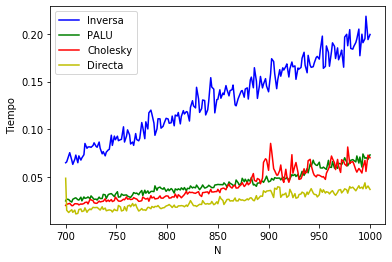

In [14]:
plt.plot(ns, inv, "b-",label= "Inversa")
plt.plot(ns, palu, "g-",label= "PALU")
plt.plot(ns, ch, "r-",label= "Cholesky")
plt.plot(ns, Dir, "y-",label= "Directa")

plt.ylabel("Tiempo")
plt.xlabel("N")
plt.legend()
plt.show()